# Homework 2.1 - implement N-gram count

Given a text document, implement a python function to collect n-gram counts from the text. First download your datasets of your choice from project Gutenberg. Or you can load it from the URL directly usng the method from NLTK book (https://www.nltk.org/book/ch03.html).

0. Each team should first decide on two books to download frm project Gutenburg(https://www.gutenberg.org). Use wget (example below) to download the txt version of the books. 

1. Please implement your data loading and text cleaning (preprocessing) as well as n-gram count methods in the following class. Feel free to add methods as you need. You can do some exploration to decide level of text cleaning needed. The simplest would be to remove all punctuations, arabic numbers, etc. You can use simple python method, regular expressions, etc. Manually inspect the outcome of your text cleaning. Is it what you expected?

2. Example usage of the class is provided. 

3. Run your code and collect n-gram counts from the book. Print out the top ten unigrams, bigrams and trigrams and their counts. 

4. Plot a histogram of the top 50 unigram, bigrams and trigrams and their counts. What do you observe in the distribution?

5. Repeat steps 1-5 on both books.

In [1]:
import matplotlib.pyplot as plt

In [2]:
%%capture
!pip install scattertext

In [3]:
%%capture
!wget https://www.gutenberg.org/files/1513/1513-0.txt
!wget https://www.gutenberg.org/files/84/84-0.txt

In [4]:
from collections import defaultdict

class NgramCount:
    def __init__(self):
        self.text=""
        
    def collect_ngram_count(self, n:int):
        """method to collect n-gram counts from text
        Args:
            text: input text document string
            n: n-gram (e.g., 2-gram, 3-gram, etc)
        Returns:
            dict of n-gram counts. e.g., if n==2, 
            the dict keys are all possible bigrams strings from the document, 
            and the values indicate the number of times that bigram appeared in the document
        """
        if n < 1 or n > len(tokens):
            raise ValueError("n must be at least 1 and no more than the amount of words in the text!")
        
        tokens = self.preprocess()
        ngram_counts = {}
        for i in range(len(tokens) - n + 1): #loop for however many tuples there are
            ngram = tuple(tokens[i:i+n]) #ngram is a tuple made of the n amount of words from i to i+n
            ngram_counts[ngram] = ngram_counts.get(ngram, 0) + 1 #this adds 1 to the ngram counter each time that ngram is recognized
            
        return ngram_counts
            
    def file_reader(self, file_name:str):
        """method to read text file into string
        Args: 
            file_name: the file name of the document you want to process
        Returns: 
            nothing, but the class variable self.text should be updated to reflect
            a string representation of the entire document 
             
        """
        #open the file, set it to self, but if it's not found, then raise an error
        try:
            with open(file_name,'r') as file:
                self.text = file.read()
        except FileNotFoundError:
            raise FileNotFoundError(f"File not found! Or wrong file name?")
        
        
    def preprocess(self):
        """method for preprocessing the text, including cleaning up the text, tokenize it, etc., using 
        regular expression tools. 
        Returns:
            a clean list of tokens in the text document, e.g., 
            ['The','Project','Gutenberg','eBook','of','Moby-Dick','or','The','Whale','by','Herman','Melville',...]
        """
        if not self.text:
            raise ValueError("use file_reader to read the text before preprocessing!")
        
        start = self.text.find('***', self.text.find('***') + 3) 
        end = self.text.find('***', start + 3)
        
        extracted_text = self.text[start + 3:end] #extract the text from after the second *** and before the third ***
        
        chars_remove = ".,?!1234567890-()[]{}:;\"'_"
        cleaned_text = ''.join([char for char in extracted_text if char not in chars_remove])
        tokens = cleaned_text.lower().split()
        
        return tokens

## Example Usage
```
nc=NgramCount()
nc.file_reader("2701-0.txt")
nc.preprocess()
nc.collect_ngram_count(2)
```
            

In [5]:
nc=NgramCount()
nc.file_reader("84-0.txt")
# nc.file_reader("1513-0.txt")
nc.preprocess()
unigram_counter_Frankenstein = nc.collect_ngram_count(1)
bigram_counter_Frankenstein = nc.collect_ngram_count(2)
trigram_counter_Frankenstein = nc.collect_ngram_count(3)

In [10]:
def print_top_ngrams(ngram_counts, ngram_type, top=10):
    sorted_ngrams = sorted(ngram_counts.items(), key=lambda x: x[1], reverse=True)
    top_ngrams = sorted_ngrams[:top]
    #print the top ngrams, separating each word by a comma, and listing the number of times it's seen after
    print(f"Top {top} {ngram_type}:")
    for ngram, count in top_ngrams:
        print(f"{ngram}: {count}")

In [11]:
print_top_ngrams(unigram_counter_Frankenstein, "Unigrams")
print_top_ngrams(bigram_counter_Frankenstein, "Bigrams")
print_top_ngrams(trigram_counter_Frankenstein, "Trigrams")

Top 10 Unigrams:
('the',): 4154
('and',): 2958
('i',): 2766
('of',): 2638
('to',): 2087
('my',): 1751
('a',): 1382
('in',): 1123
('was',): 1020
('that',): 1004
Top 10 Bigrams:
('of', 'the'): 526
('of', 'my'): 272
('in', 'the'): 261
('i', 'was'): 226
('i', 'had'): 217
('and', 'i'): 199
('that', 'i'): 198
('and', 'the'): 198
('to', 'the'): 190
('which', 'i'): 149
Top 10 Trigrams:
('which', 'i', 'had'): 38
('i', 'did', 'not'): 33
('i', 'could', 'not'): 32
('that', 'i', 'had'): 25
('but', 'i', 'was'): 24
('the', 'old', 'man'): 23
('chapter', 'chapter', 'chapter'): 22
('that', 'i', 'was'): 22
('me', 'and', 'i'): 20
('that', 'i', 'might'): 18


In [15]:
import matplotlib.pyplot as plt

def plot_histogram(ngram_counts, ngram_type, top_n=10):
    top_ngrams = sorted(ngram_counts.items(), key=lambda x: x[1], reverse=True)[:top_n]
    ngrams, counts = zip(*top_ngrams)
    
    ngrams = [' '.join(ngram) for ngram in ngrams]
    
    plt.figure(figsize=(20, 15))
    plt.barh(range(len(ngrams)), counts, tick_label=ngrams)
    plt.xlabel("Count")
    plt.ylabel(f"Top {top_n} {ngram_type}")
    plt.title(f"Top {top_n} {ngram_type} Histogram")
    plt.gca().invert_yaxis()
    plt.show()

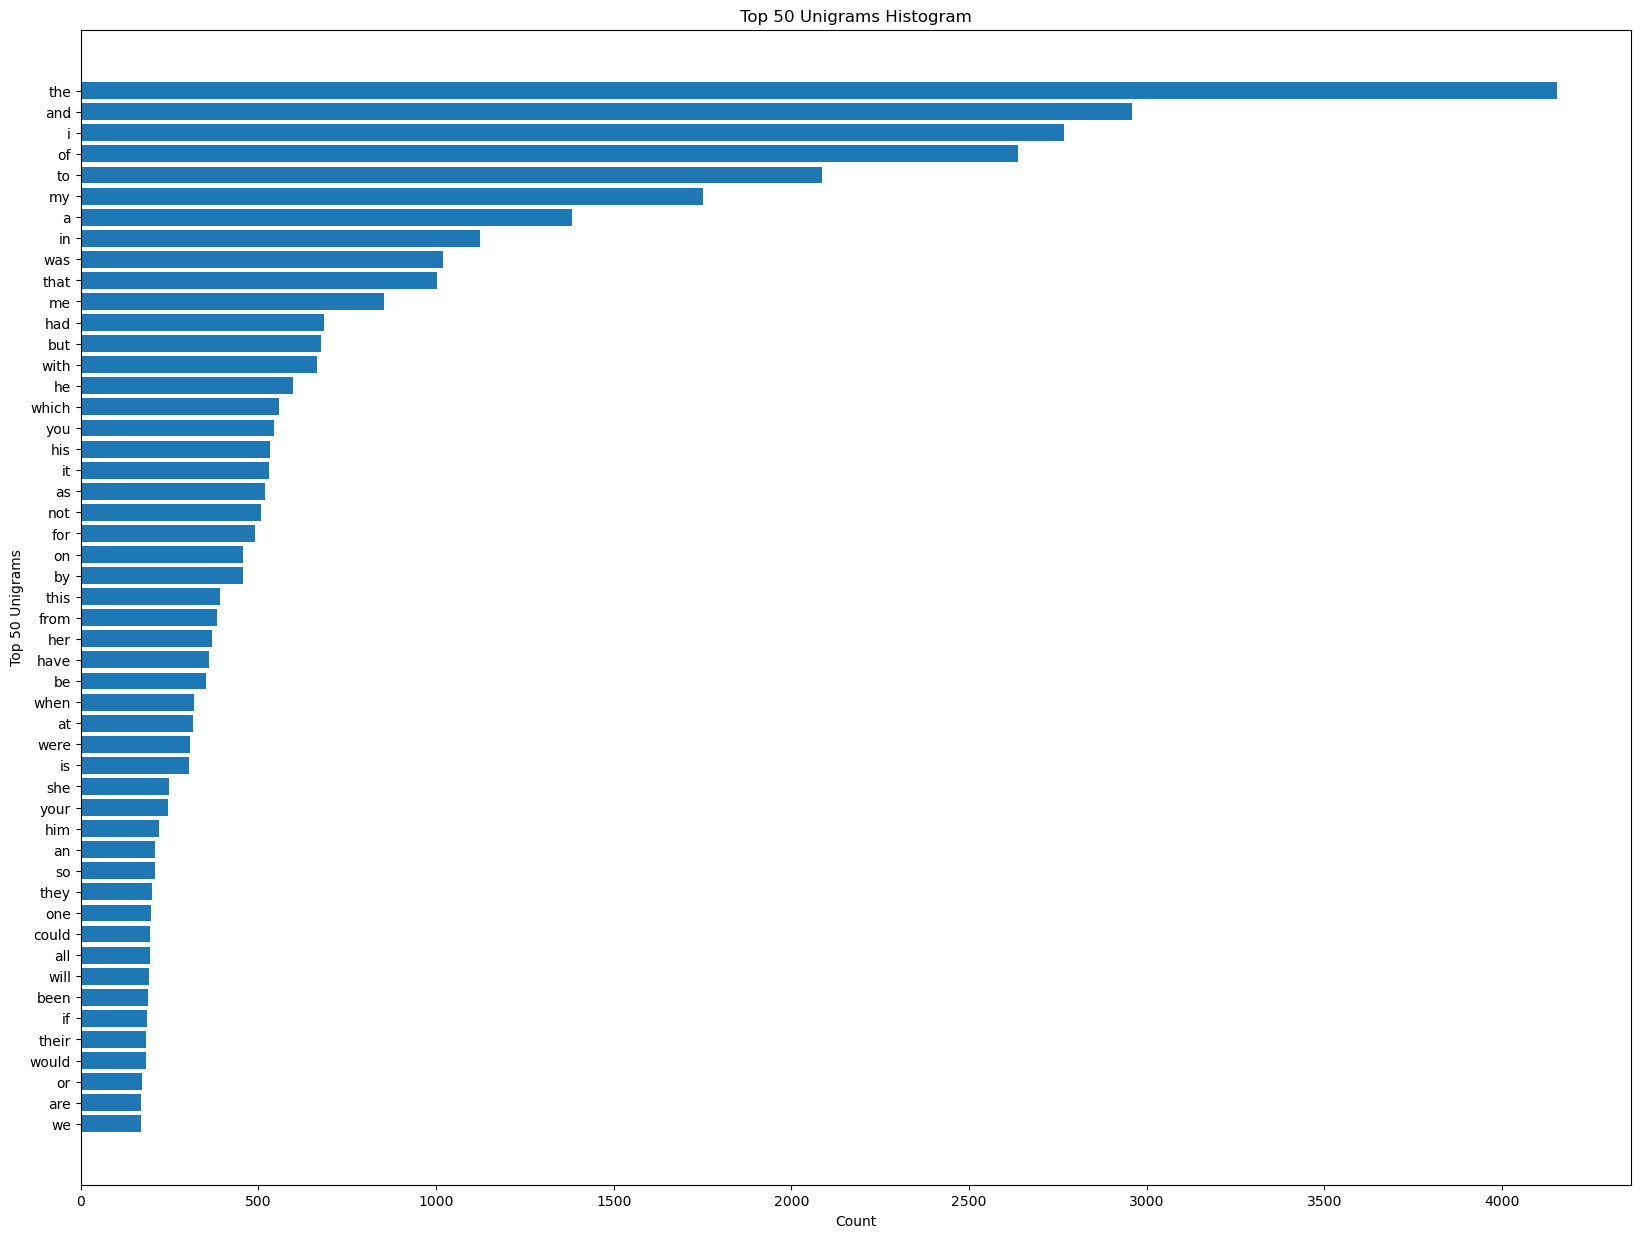

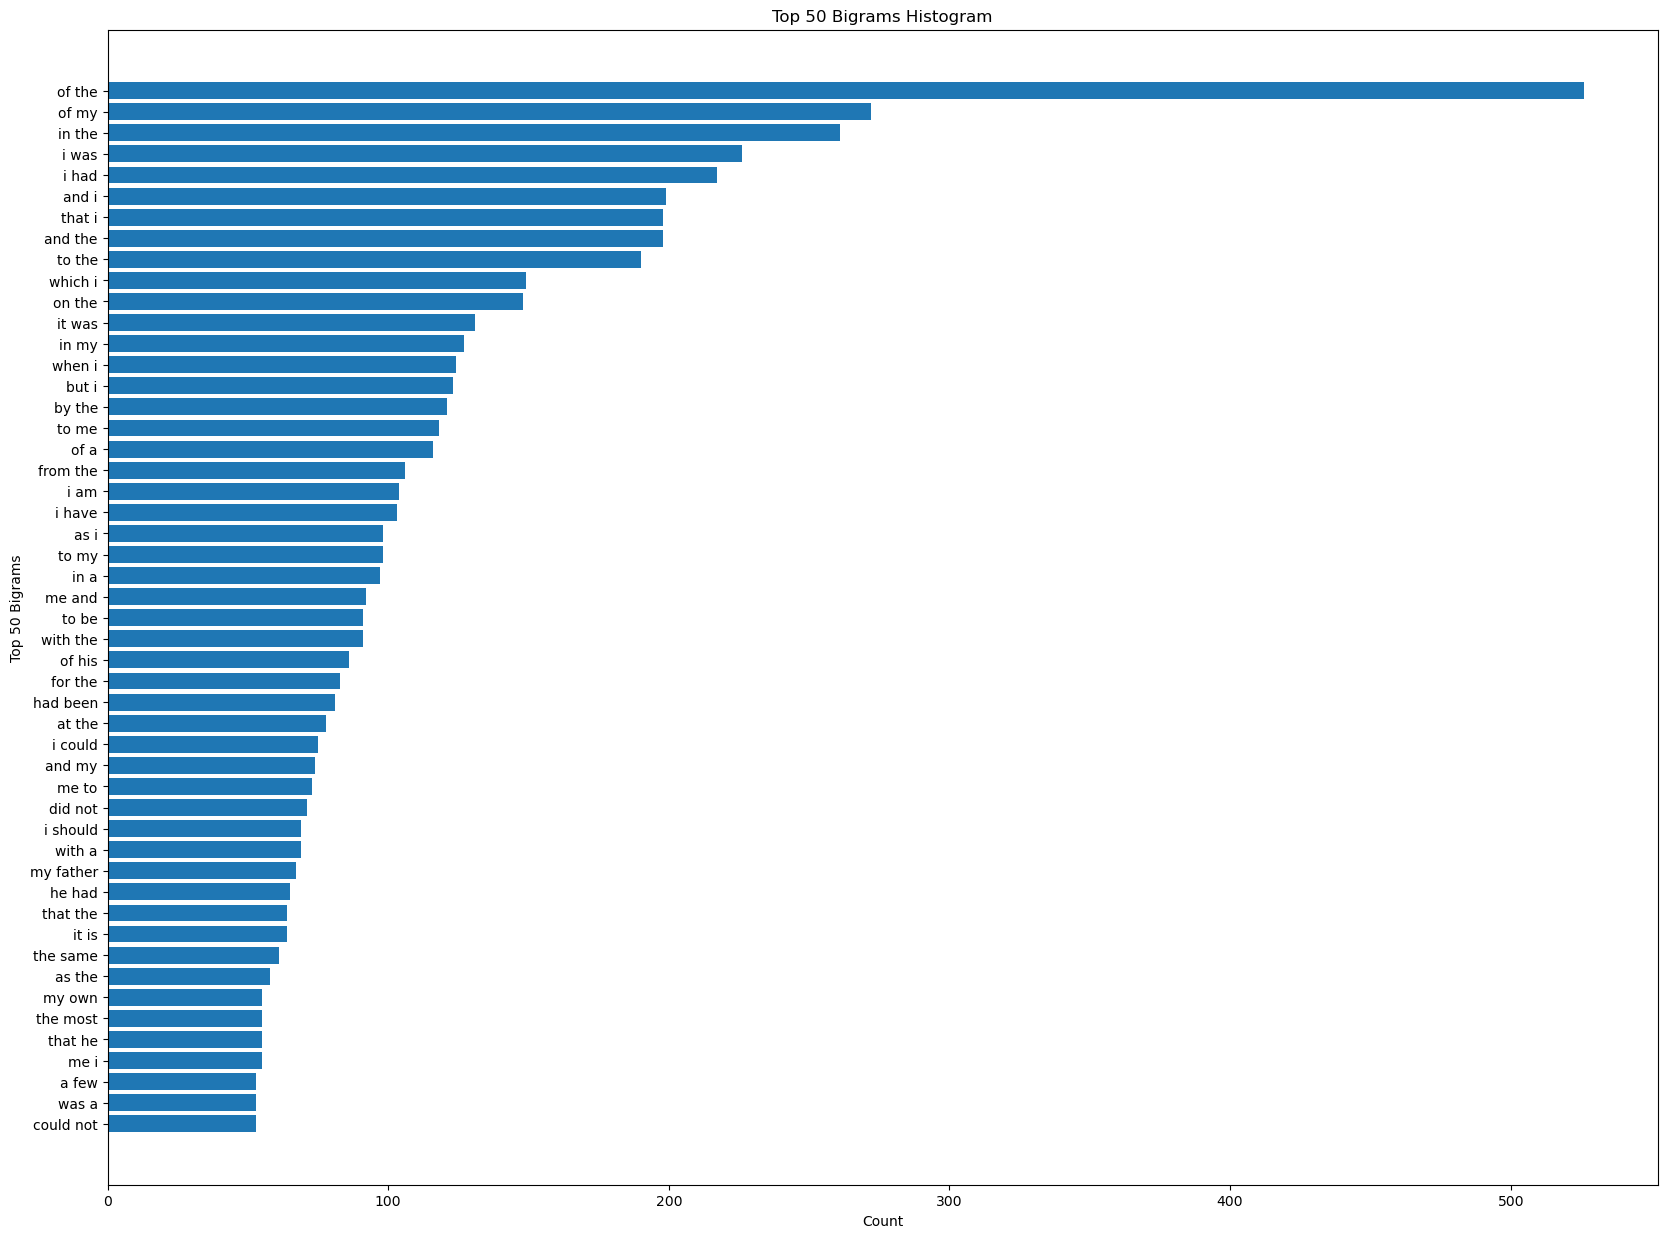

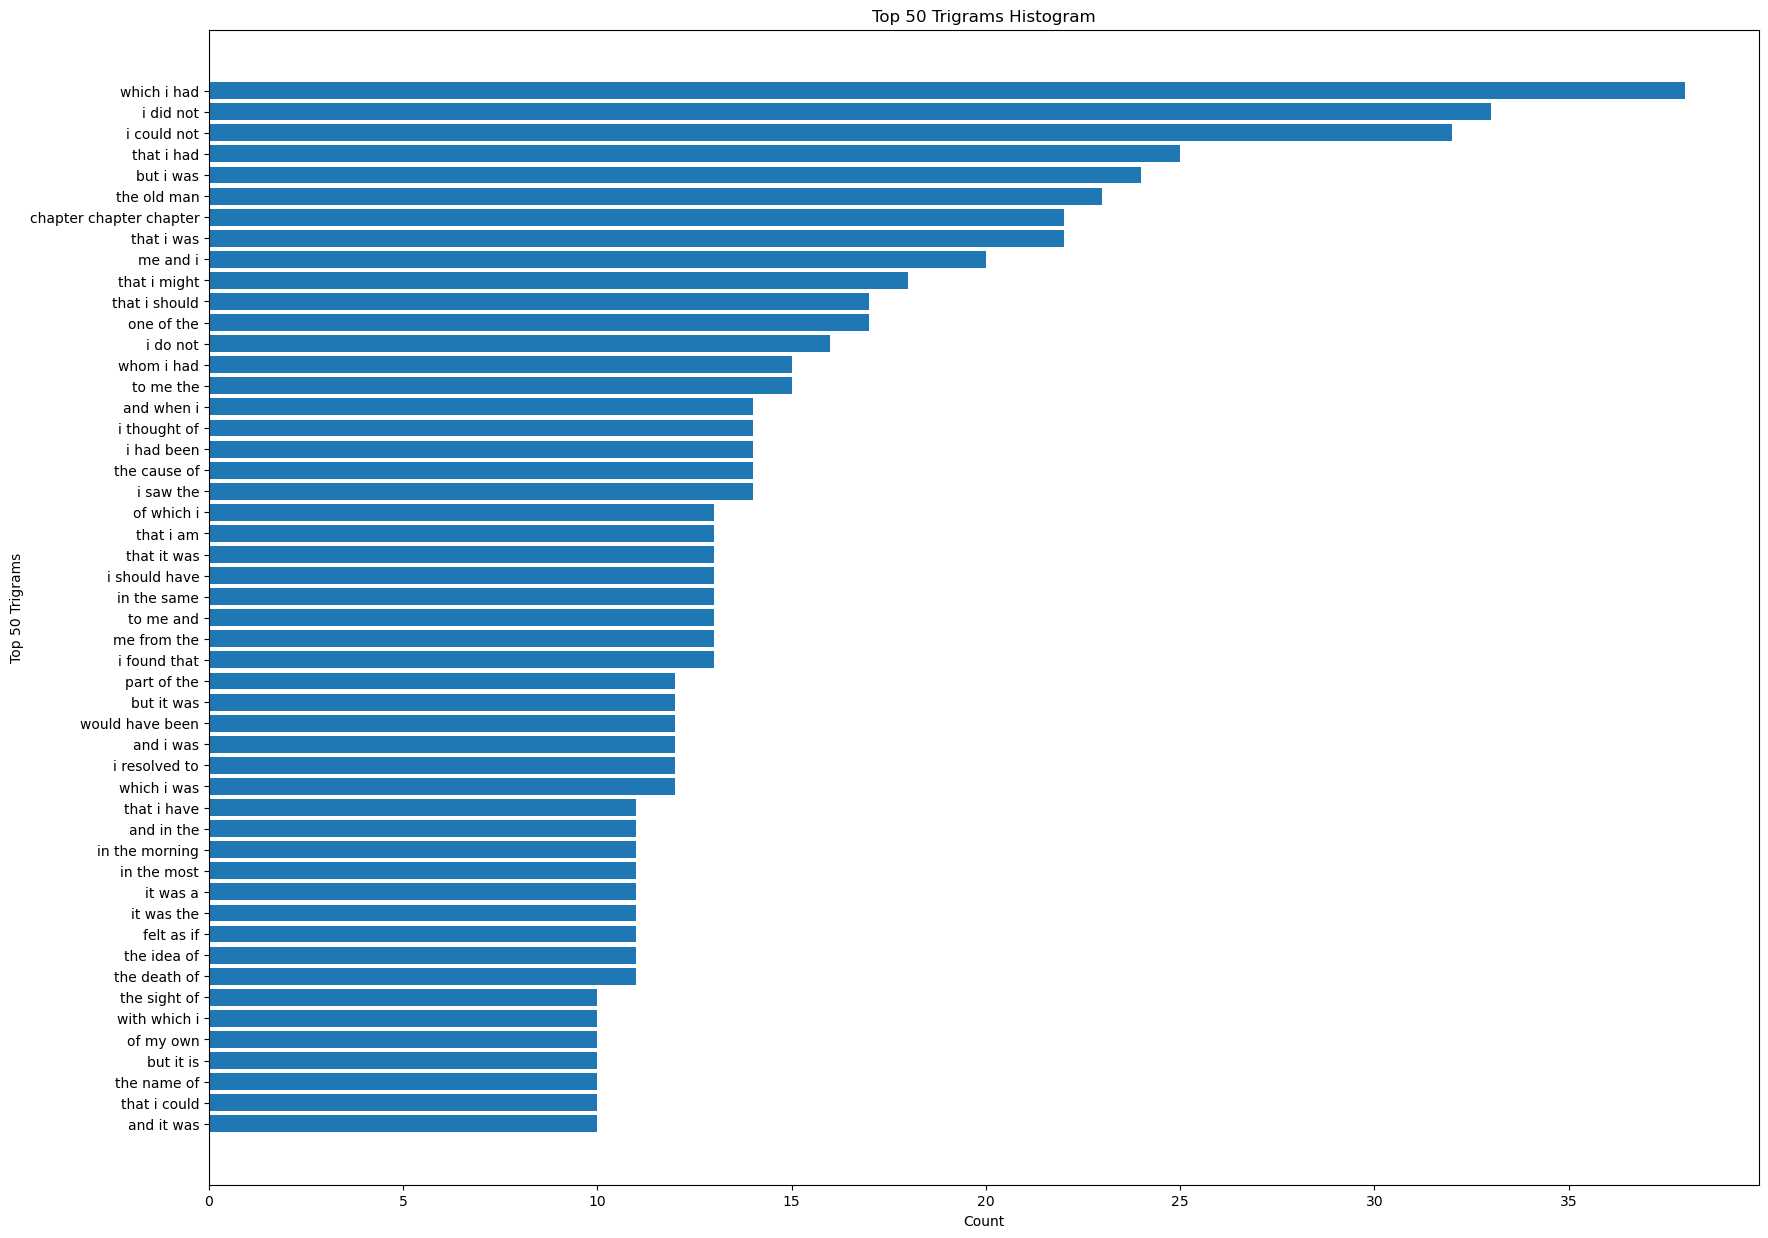

In [16]:
plot_histogram(unigram_counter_Frankenstein, "Unigrams", top_n=50)
plot_histogram(bigram_counter_Frankenstein, "Bigrams", top_n=50)
plot_histogram(trigram_counter_Frankenstein, "Trigrams", top_n=50)

In [17]:
nc=NgramCount()
# nc.file_reader("84-0.txt")
nc.file_reader("1513-0.txt")
nc.preprocess()
unigram_counter_RJ = nc.collect_ngram_count(1)
bigram_counter_RJ = nc.collect_ngram_count(2)
trigram_counter_RJ = nc.collect_ngram_count(3)

In [18]:
print_top_ngrams(unigram_counter_RJ, "Unigrams")
print_top_ngrams(bigram_counter_RJ, "Bigrams")
print_top_ngrams(trigram_counter_RJ, "Trigrams")

Top 10 Unigrams:
('and',): 733
('the',): 688
('i',): 580
('to',): 541
('a',): 483
('of',): 395
('my',): 355
('that',): 346
('is',): 344
('in',): 333
Top 10 Bigrams:
('friar', 'lawrence'): 66
('lady', 'capulet'): 60
('i', 'will'): 60
('i', 'am'): 54
('in', 'the'): 43
('of', 'the'): 40
('to', 'the'): 36
('i', 'have'): 36
('it', 'is'): 34
('is', 'the'): 29
Top 10 Trigrams:
('in', 'capulet’s', 'house'): 12
('friar', 'lawrence’s', 'cell'): 10
('capulet', 'lady', 'capulet'): 8
('go', 'with', 'me'): 8
('i', 'pray', 'thee'): 7
('room', 'in', 'capulet’s'): 6
('scene', 'iv', 'a'): 6
('hall', 'in', 'capulet’s'): 6
('what', 'say', 'you'): 6
('lady', 'capulet', 'and'): 6


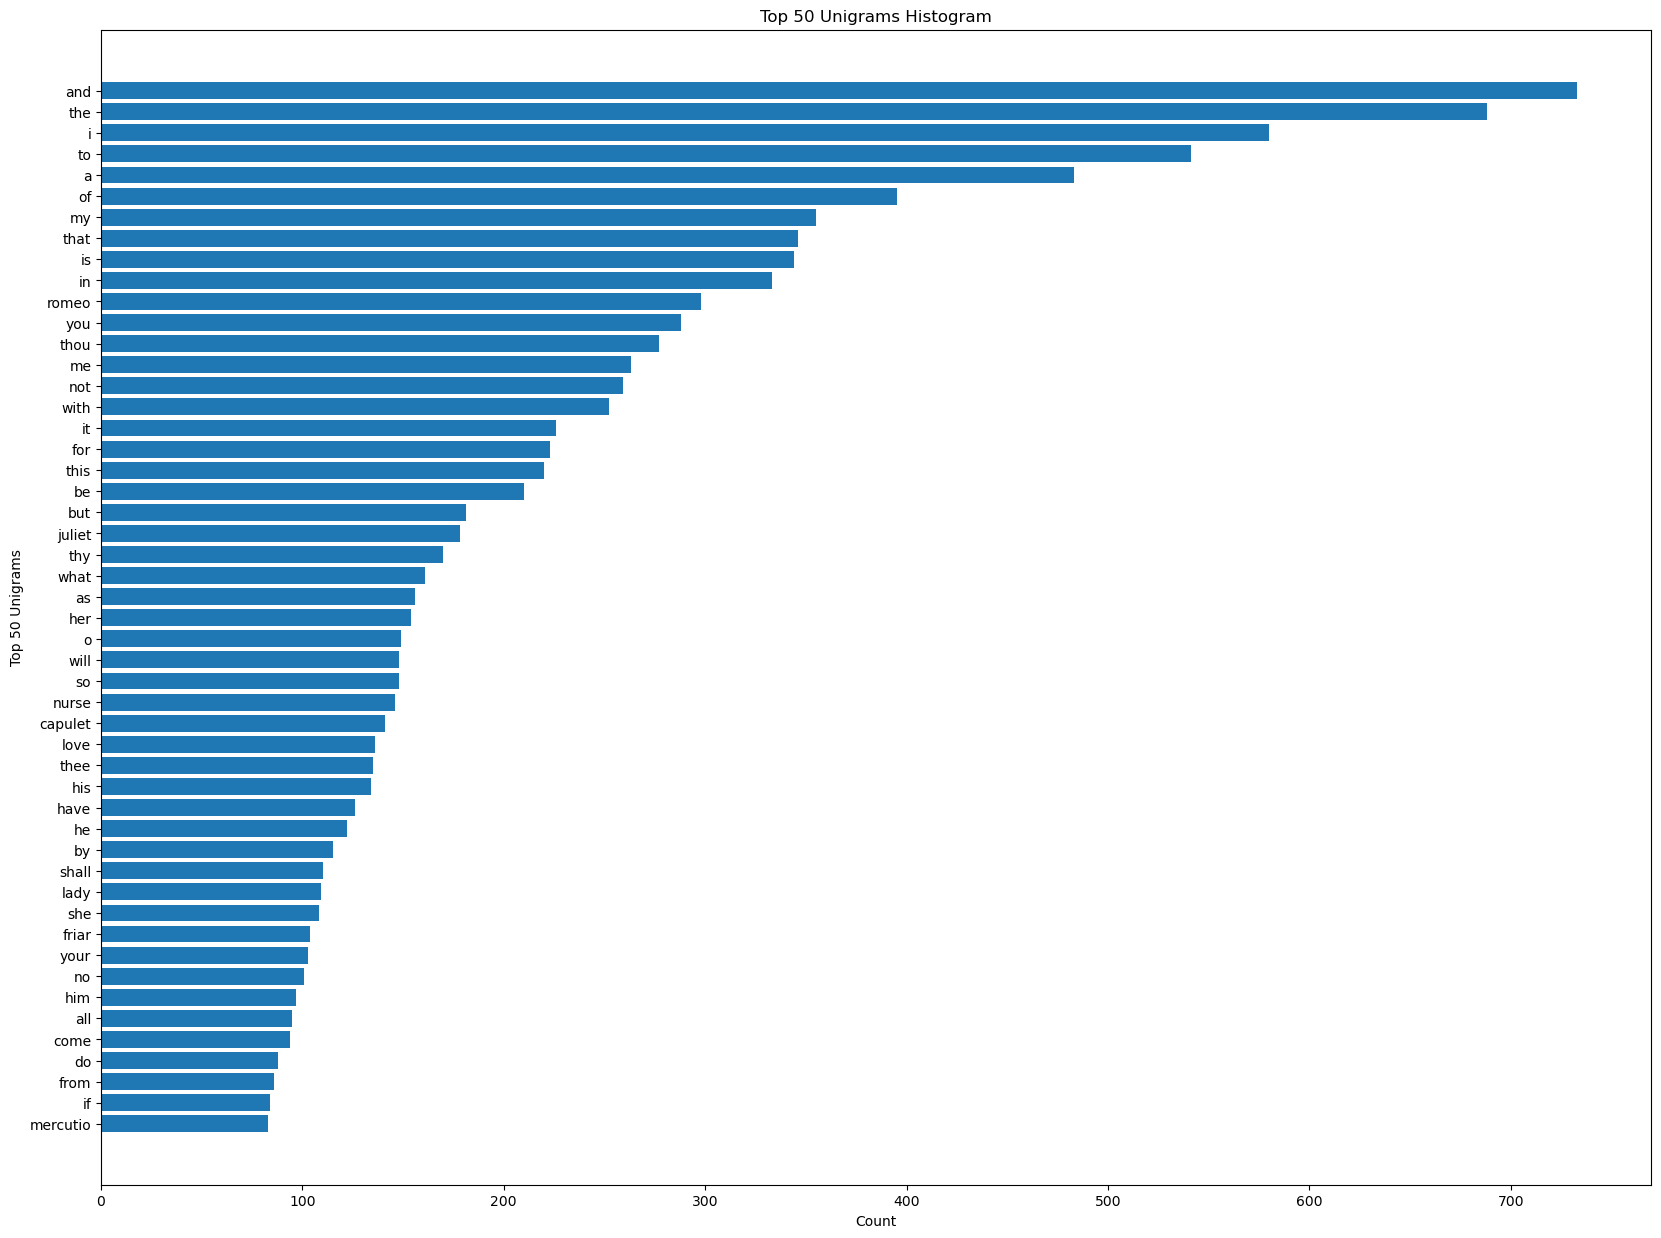

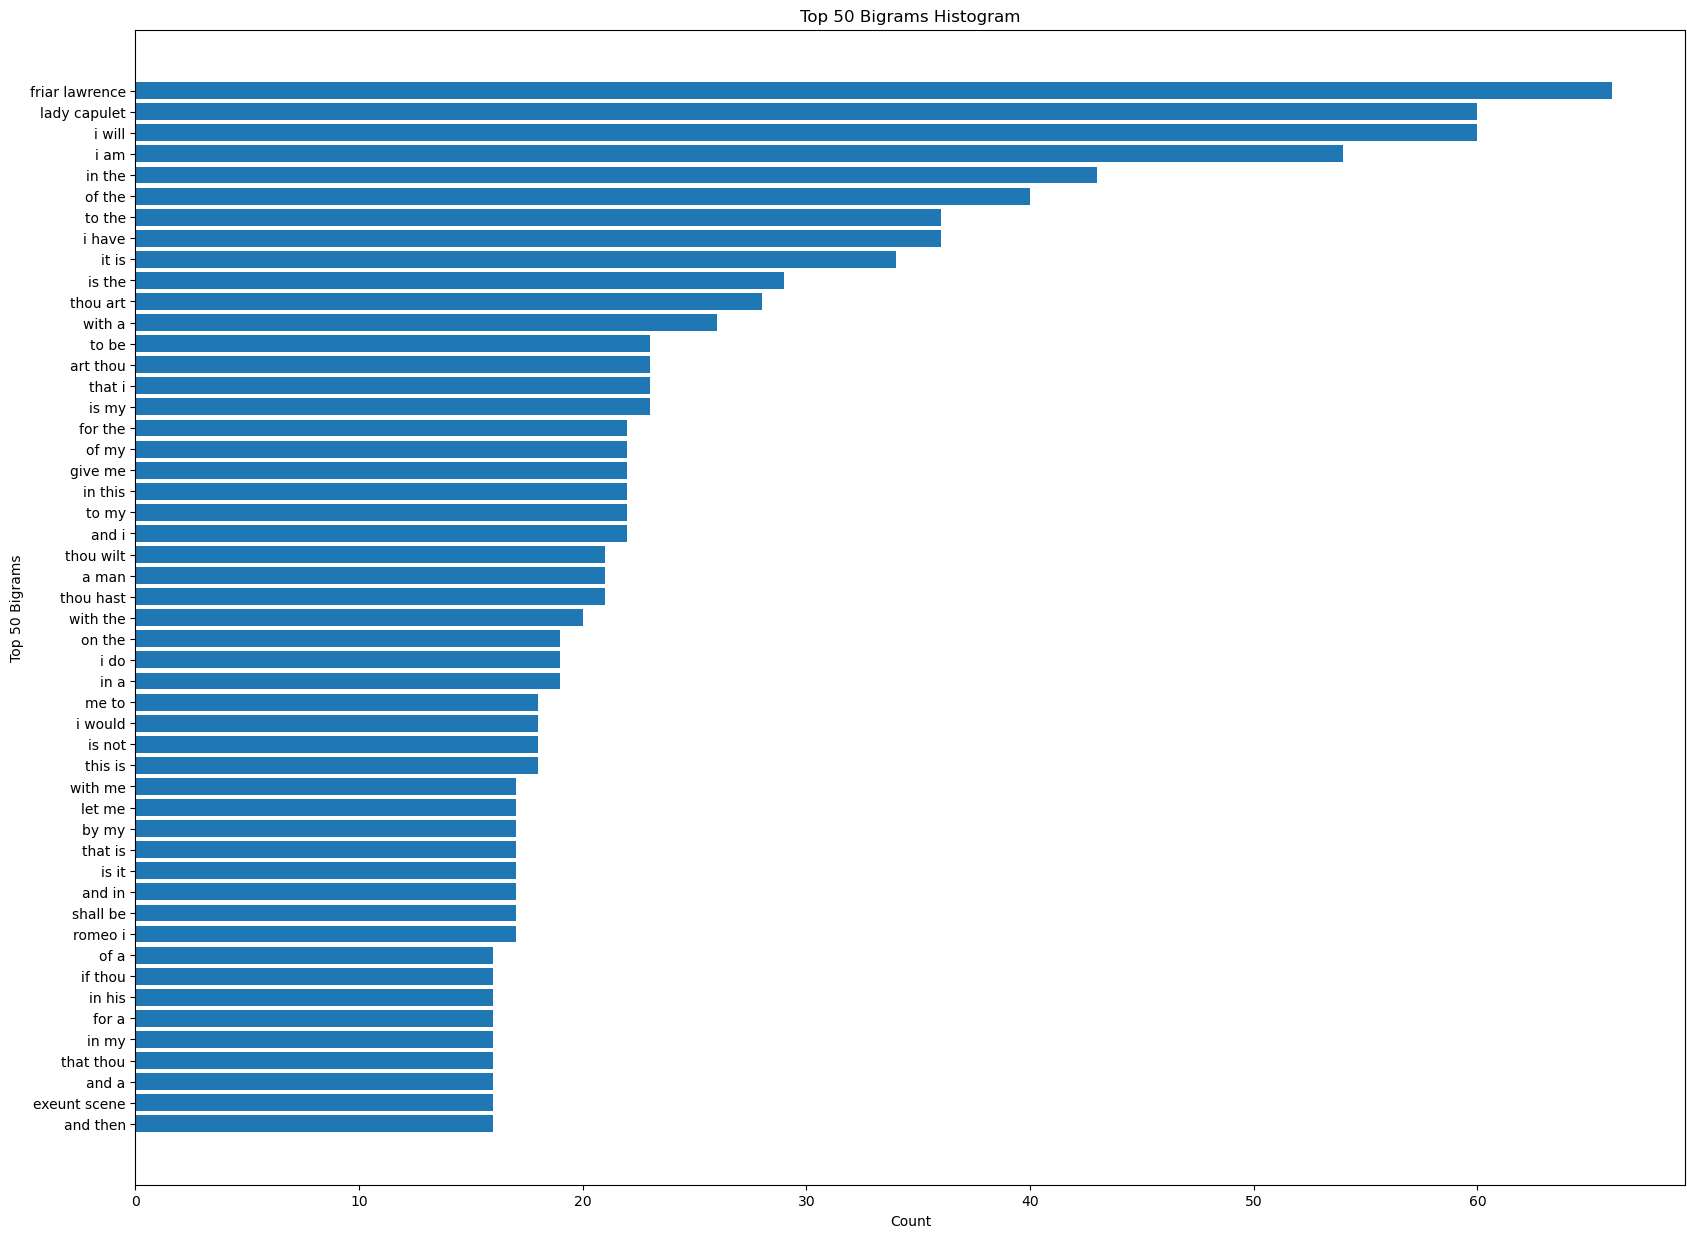

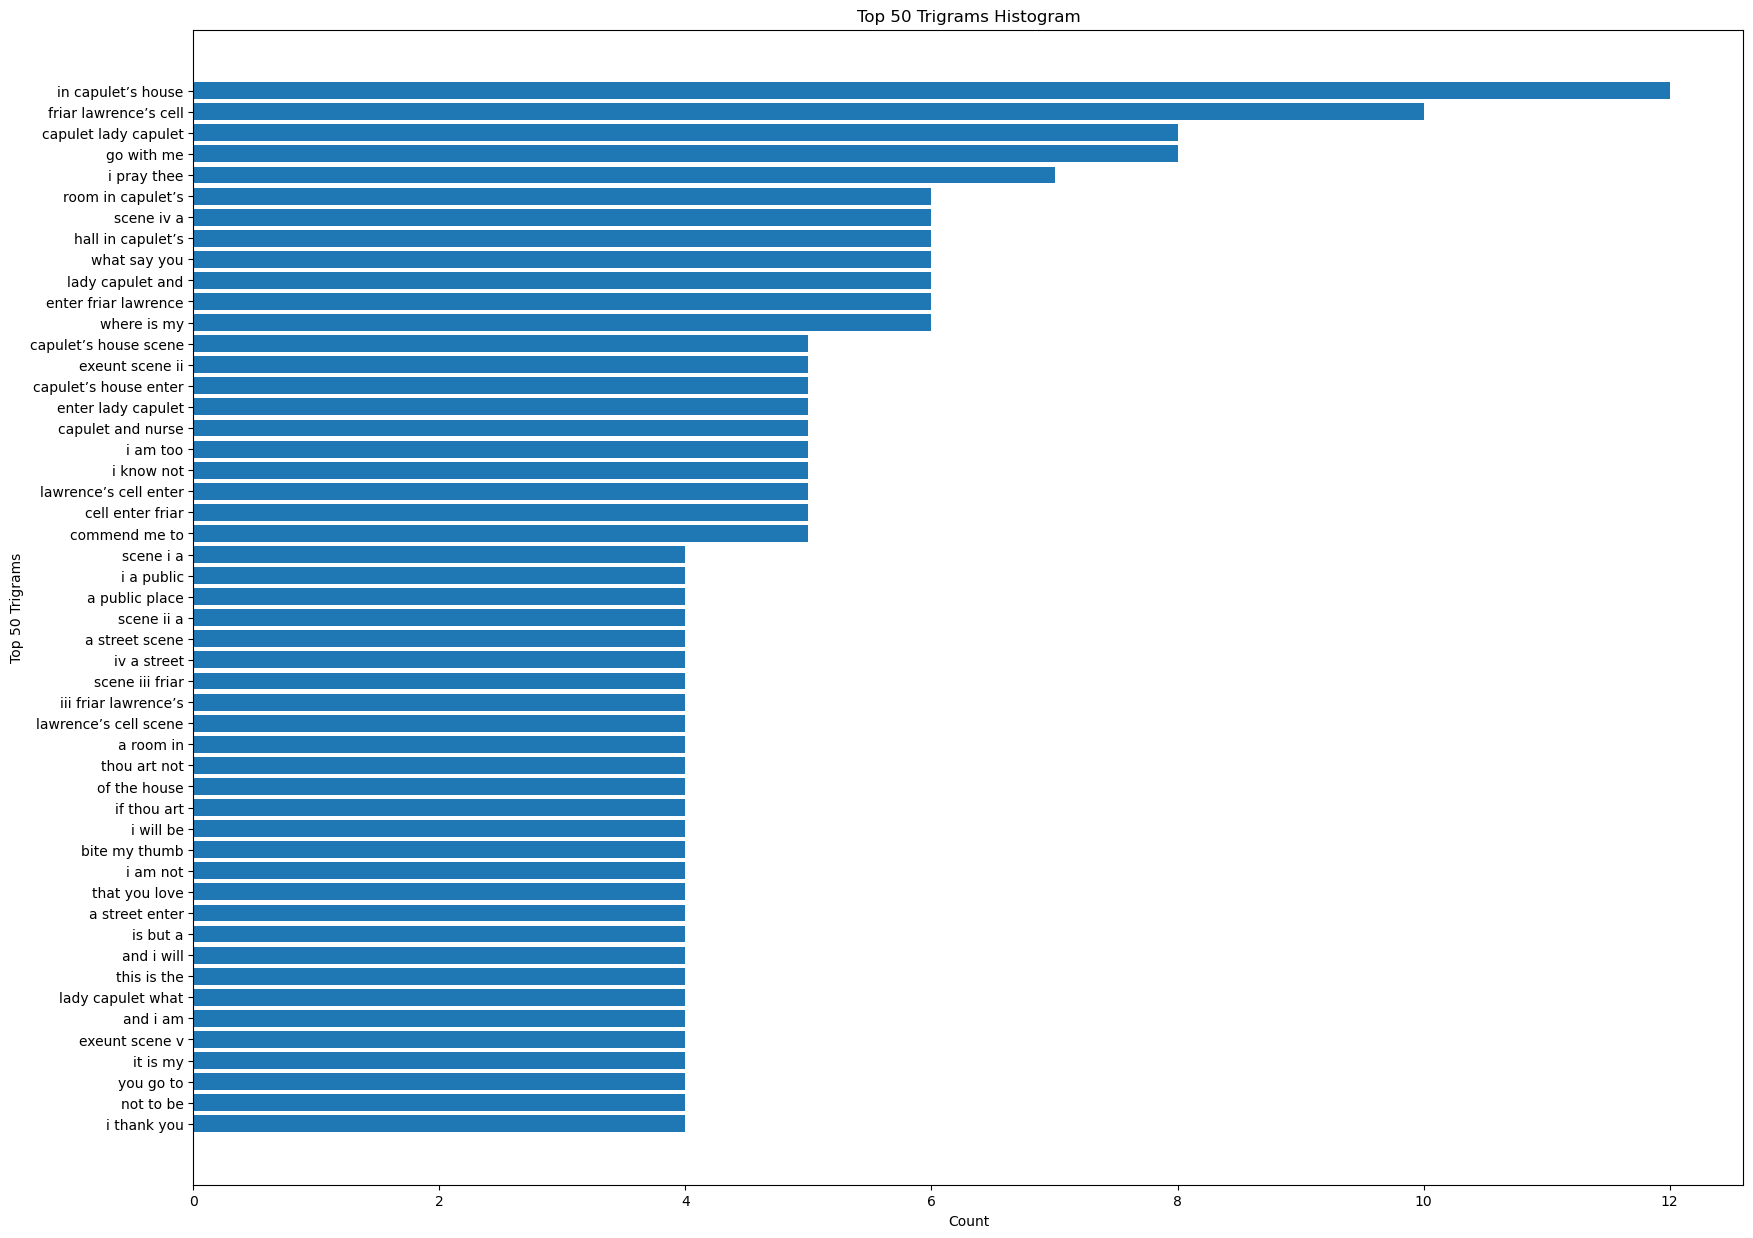

In [19]:
plot_histogram(unigram_counter_RJ, "Unigrams", top_n=50)
plot_histogram(bigram_counter_RJ, "Bigrams", top_n=50)
plot_histogram(trigram_counter_RJ, "Trigrams", top_n=50)